In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv('C:/Users/sarni/OneDrive/Desktop/Algerian_forest_fires_dataset_cleaned.csv')

In [74]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [75]:
df.drop(['day','month','year'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
243,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [76]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [77]:
### DEPENDENT AND INDEPENDENT VARIABLE
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [78]:
### TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### INDEPENDENT VARIABLES SHOULD NOT BE TOO MUCH CORRELATED.

<Axes: >

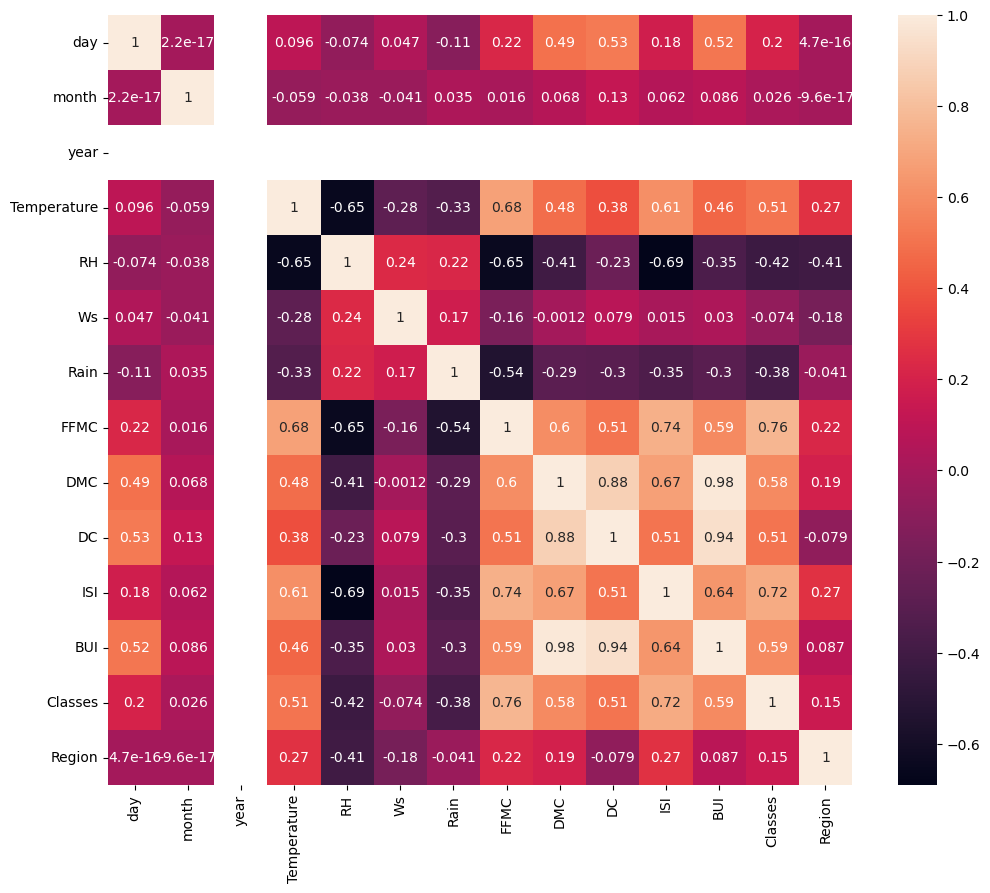

In [79]:
plt.figure(figsize=(12,10))
corr_X=X.corr()
sns.heatmap(corr_X,annot=True)

In [80]:
def Corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
corr_features=Corr(X_train,0.85)

In [82]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((184, 12), (62, 12))

In [83]:
### STANDARDIZATION

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [84]:
X_train_scaled

array([[-0.60394168,  1.41660422,  0.        , ..., -0.95594039,
        -1.11530374, -1.01092929],
       [-0.25573454,  0.50878039,  0.        , ...,  0.61145737,
         0.89661673,  0.98918887],
       [-1.41642499, -1.30686727,  0.        , ..., -1.04814026,
        -1.11530374,  0.98918887],
       ...,
       [-1.64856308,  1.41660422,  0.        , ..., -1.07119023,
        -1.11530374, -1.01092929],
       [ 1.25316304, -0.39904344,  0.        , ..., -0.74849069,
        -1.11530374,  0.98918887],
       [-0.48787263,  1.41660422,  0.        , ..., -0.86374052,
        -1.11530374, -1.01092929]])

Text(0.5, 1.0, 'X_TRAIN AFTER SCALING')

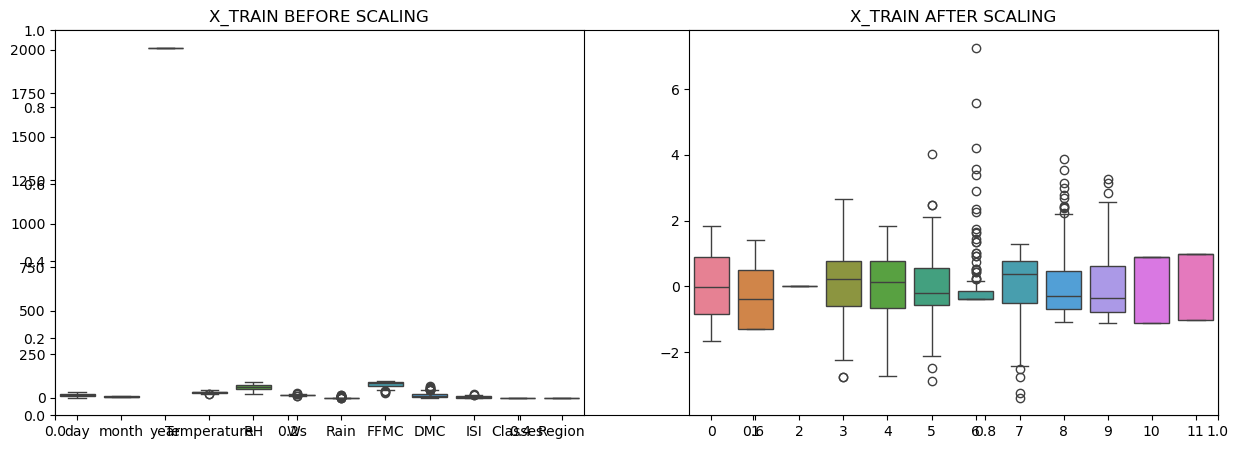

In [85]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_TRAIN BEFORE SCALING')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_TRAIN AFTER SCALING')

In [86]:
import numpy as np

mask=~np.isnan(X_train_scaled).any(axis=1)&~np.isnan(y_train)

X_train_clean=X_train_scaled[mask]
y_train_clean=y_train[mask]

In [87]:
y_train_clean=y_train_clean.ravel()

C:\Users\sarni\AppData\Local\Temp\ipykernel_1652\1172199735.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train_clean=y_train_clean.ravel()


In [88]:
X_train_clean=np.array(X_train_clean)

In [90]:
print(type(X_train_clean),X_train_clean.shape)
print(type(y_train_clean),y_train_clean.shape)

<class 'numpy.ndarray'> (181, 12)
<class 'numpy.ndarray'> (181,)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linereg=LinearRegression()
linereg.fit(X_train_clean,y_train_clean)
y_pred=linereg.predict(X_train_clean)
mae=mean_absolute_error(y_train_clean,y_pred)
score=r2_score(y_train_clean,y_pred)
print(mae)
print(score)



0.7257063219932911
0.9729826376489072


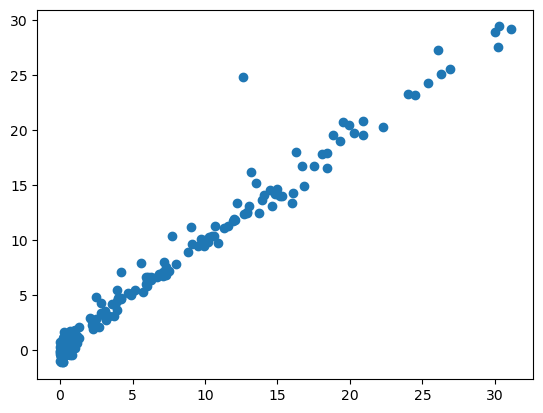

In [94]:
plt.scatter(y_train_clean,y_pred)

### LASSO REGRESSION

In [101]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso()
lasso_reg.fit(X_train_clean,y_train_clean)
y_pred=lasso_reg.predict(X_train_clean)
mae=mean_absolute_error(y_train_clean,y_pred)
scoree=r2_score(y_train_clean,y_pred)
print(mae)
print(scoree)


1.2853439766173307
0.9474103161758795


### RIDGE REGRESSION

In [102]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge()
ridge_reg.fit(X_train_clean,y_train_clean)
y_pred=ridge_reg.predict(X_train_clean)
mae=mean_absolute_error(y_train_clean,y_pred)
scoreee=r2_score(y_train_clean,y_pred)
print(mae)
print(scoreee)

0.7376442379656684
0.9729348457449899


In [103]:
from sklearn.linear_model import ElasticNet

elasticnet_reg=ElasticNet()
elasticnet_reg.fit(X_train_clean,y_train_clean)
y_pred=elasticnet_reg.predict(X_train_clean)
mae=mean_absolute_error(y_train_clean,y_pred)
scoreeee=r2_score(y_train_clean,y_pred)
print(mae)
print(scoreeee)

1.8920443449124507
0.8927321878716754


### CROSS VALIDATION

In [104]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_clean,y_train_clean)

LassoCV(cv=5)

In [105]:
lassocv.predict(X_test_scaled)

array([ 1.75735479e+00,  7.54748853e+00,  9.08840525e+00,  1.62104232e+01,
        6.76198580e+00,  1.78825820e+00,  1.06260694e+01, -6.06943819e-01,
        1.88920209e+00,  1.44458287e+01,  9.32270279e+00,  1.00575558e+01,
        1.90516321e+01,  1.69384657e+01,  7.19490172e+00, -5.33392187e-01,
        2.10644174e+00, -4.92904044e-01,  1.09378328e+01,  8.18773483e+00,
       -1.03434930e-02,  2.18633406e-01,  8.55459009e+00,  8.25769091e+00,
       -3.70154170e-01,  5.06436157e+00,  5.98854717e+00,  5.79597993e+00,
        7.45643324e-02,  1.99634118e+00,  6.42209992e+00,  6.85614542e+00,
        2.14523927e+00,  1.03264603e+01, -3.74586757e-01,  1.64160266e+00,
        1.99667381e+00,  1.53017899e+01,  1.37157615e+01,  5.97190162e-01,
        1.59757437e+01,  8.09414294e+00,  1.45557548e+01,  1.30428477e+01,
       -7.02661078e-01,  1.87014781e+00,  3.32897400e+00,  8.42093210e+00,
        1.41164959e+00,  2.04123080e-01, -3.90870088e-01,  4.73389713e+00,
        4.74971217e+00,  

In [106]:
lassocv.alpha_

0.043592574902712934

In [107]:
lassocv.alphas_

array([7.10450353, 6.62568377, 6.17913486, 5.76268185, 5.37429638,
       5.01208679, 4.67428892, 4.35925749, 4.06545813, 3.79145985,
       3.53592815, 3.29761843, 3.07536998, 2.86810034, 2.67479997,
       2.49452741, 2.32640461, 2.16961273, 2.02338809, 1.8870185 ,
       1.75983977, 1.64123246, 1.53061889, 1.4274603 , 1.33125425,
       1.24153217, 1.15785706, 1.07982137, 1.00704502, 0.93917356,
       0.8758764 , 0.81684526, 0.76179263, 0.71045035, 0.66256838,
       0.61791349, 0.57626819, 0.53742964, 0.50120868, 0.46742889,
       0.43592575, 0.40654581, 0.37914599, 0.35359281, 0.32976184,
       0.307537  , 0.28681003, 0.26748   , 0.24945274, 0.23264046,
       0.21696127, 0.20233881, 0.18870185, 0.17598398, 0.16412325,
       0.15306189, 0.14274603, 0.13312543, 0.12415322, 0.11578571,
       0.10798214, 0.1007045 , 0.09391736, 0.08758764, 0.08168453,
       0.07617926, 0.07104504, 0.06625684, 0.06179135, 0.05762682,
       0.05374296, 0.05012087, 0.04674289, 0.04359257, 0.04065

In [108]:
lassocv.mse_path_

array([[56.34509864, 35.21898471, 53.63487276, 78.82475678, 72.79352868],
       [50.87923356, 30.85002838, 46.93015127, 78.46622892, 72.31926477],
       [46.05655272, 27.04757743, 41.0760572 , 69.86244939, 63.05853311],
       [40.49529812, 23.73810834, 35.97480354, 62.44513544, 54.94057057],
       [35.61568991, 20.8574312 , 31.52883771, 54.79598533, 47.88676469],
       [31.35452417, 18.35000432, 27.65360497, 48.01403555, 41.75815235],
       [27.63240788, 16.16726682, 24.27524374, 42.14362852, 36.43361667],
       [24.37986944, 14.26705599, 21.3294301 , 37.06494139, 31.80823832],
       [21.5374207 , 12.61261909, 18.760592  , 32.67265678, 27.79047166],
       [19.05224893, 11.17220647, 16.51995492, 28.87569184, 24.30070762],
       [16.8786914 ,  9.91796733, 14.56520115, 25.59445492, 21.27009355],
       [14.97697432,  8.8257495 , 12.85949592, 22.76127619, 18.63839832],
       [13.3124496 ,  7.87454015, 11.37061687, 20.31595739, 16.35338068],
       [11.8549309 ,  7.04605731, 10.0